In [40]:
import IO
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.artist as art
import matplotlib.lines as lines
import scipy as sp
import numpy as np
import glob
import deriv
import blpoly
from operator import itemgetter 
npfftn = np.fft.fftn
npifftn = np.fft.ifftn
import pylab as pl
import mpld3
from mpld3 import plugins
from fractions import Fraction
import IO
import tools
mpld3.enable_notebook()

In [41]:
resolution = 8
bdim=False
Xinflow =  0.2583
Xoutflow = 8.0
Xequiv=4.5

Yup = 0.145
Ylow = -0.0292

### Full case with low resolution ###
if resolution == 1:
# set list of spacings:
    # spacing at TE 
    y_spacing = 0.00025*4 
    x_spacing = 7.57e-3*4
    # X/I direction
    Nzone=10
    # Y/J direction
    Nfst = int(174 /4)

if resolution == 2:
# set list of spacings:
    # spacing at TE 
    y_spacing = 0.00025*3 
    x_spacing = 7.57e-3*3
    # X/I direction
    Nzone=15
    # Y/J direction
    Nfst = int(174 /3)    

    #FORMER 2    
### Full case with low resolution ###
if resolution == 3:
# set list of spacings:
    # spacing at TE 
    y_spacing = 0.00025*2
    x_spacing = 7.57e-3*2
    # X/I direction
    Nzone=20
    # Y/J direction
    Nfst = int(174 /2)

### Full case with low resolution ###
if resolution == 4:
# set list of spacings:
    # spacing at TE 
    y_spacing = 0.00025*1.5
    x_spacing = 7.57e-3*1.5
    # X/I direction
    Nzone=30
    # Y/J direction
    Nfst = int(174/1.5)     


    #FORMER 3
if resolution == 5:
# set list of spacings:
    # spacing at TE 
    y_spacing = 0.00025 
    x_spacing = 7.57e-3
    # X/I direction
    Nzone=40
    # Y/J direction
    Nfst = 174 

if resolution == 6:
# set list of spacings:
    # spacing at TE 
    y_spacing = 0.00025*1.5/2
    x_spacing = 7.57e-3*1.5/2
    # X/I direction
    Nzone=int(40*1.5)
    # Y/J direction
    Nfst = int(174*1.5)
    
    #FORMER 4    
if resolution == 7:
# set list of spacings:
    # spacing at TE 
    y_spacing = 0.00025 /2
    x_spacing = 7.57e-3 /2
    # X/I direction
    Nzone=40*2
    # Y/J direction
    Nfst = 174*2 
   
### Full case with low resolution ###
if resolution == 8:
# set list of spacings:
    # spacing at TE 
    y_spacing = 0.00025 /2*1.5/2
    x_spacing = 7.57e-3/2*1.5/2
    # X/I direction
    Nzone=40*3
    # Y/J direction
    Nfst = 174*3    

    #FORMER 5        
### Full case with low resolution ###
if resolution == 9:
# set list of spacings:
    # spacing at TE 
    y_spacing = 0.00025 /4
    x_spacing = 7.57e-3/4
    # X/I direction
    Nzone=40*4
    # Y/J direction
    Nfst = 174*4  
    
print 'spacing at the vortex generator:',x_spacing,y_spacing

spacing at the vortex generator: 0.00283875 9.375e-05


# Equispaced major part

number of conditions 2
order of polynomial function is 1


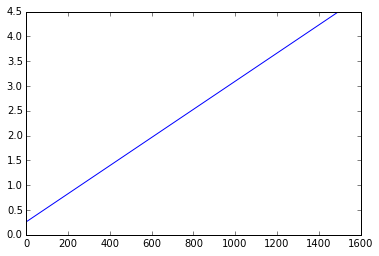

In [42]:
NEQ=int((Xequiv-Xinflow)/x_spacing)
Xequiv=Xinflow+NEQ*x_spacing
con=[]
Vcon=[]
### Value constraints
Vcon.append([0,Xinflow])
Vcon.append([NEQ,Xequiv])
con.append(Vcon)

p2=tools.polynomial(con,rest='no')    
x2=range(Vcon[0][0],Vcon[-1][0])
y2=np.zeros(len(x2))
y2=p2.evaluate(x2,maxd=6)

plt.figure()
plt.plot(x2,y2[0])

# Zonal Outflow

number of conditions 9
order of polynomial function is 8
minimum spacing and ratio between lowest and TE spacing 0.00283842906356 1.0
maximum spacing and ratio between highest and gen spacing 0.108171321452 0.00283842906356


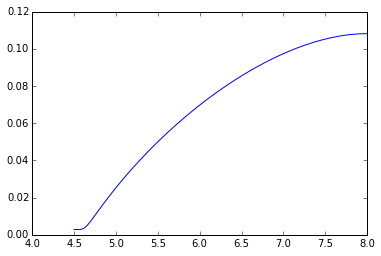

In [43]:
con=[]
Vcon=[]
Vcon.append([NEQ,Xequiv])
Vcon.append([NEQ+Nzone,Xoutflow])
con.append(Vcon)
### 1.st Derivative/Spacing constraints
Dcon=[]
Dcon.append([NEQ,x_spacing])
#Dcon.append([NEQ+Nzone,Out_spacing])
con.append(Dcon)

### 2nd. Derivative of the spacing constraint
Dcon=[]
Dcon.append([NEQ,0.0])
Dcon.append([NEQ+Nzone,0.0])
con.append(Dcon)

### 3rd. Higher derivative constraints
Dcon=[]
Dcon.append([NEQ,0.0])
con.append(Dcon)

# set 4th higher derivs to zero
Dcon=[]
Dcon.append([NEQ,0.0])
con.append(Dcon)

# set 5th higher derivs to zero
Dcon=[]
Dcon.append([NEQ,0.0])
con.append(Dcon)

# set 5th higher derivs to zero
Dcon=[]
Dcon.append([NEQ,0.0])
con.append(Dcon)


p4=tools.polynomial(con,rest='no')
x4=range(Vcon[0][0],Vcon[-1][0]+1)
y4=p4.evaluate(x4,maxd=6)
print 'minimum spacing and ratio between lowest and TE spacing', min(y4[1][:]), max(y4[1][:])/y4[1][-1]
print 'maximum spacing and ratio between highest and gen spacing', max(y4[1][:]), min(y4[1][:])   

plt.figure()
#plt.plot(x3,y3[1])
plt.plot(y4[0],y4[1])


In [44]:
iis=np.concatenate((x2,x4),axis=0)
x=np.concatenate((y2,y4),axis=1)

minimum and maximum spacing: 0.00273513793945 0.108081817627 1508 4.53913402557
spacing at the inlet: 0.00283875  and outlet: 0.108081817627


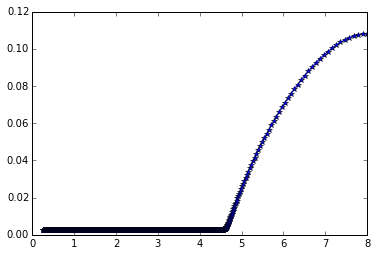

In [45]:
xspacing=[]
for i in range(1,len(x[0])):
    xspacing.append(x[0][i]-x[0][i-1])
print 'minimum and maximum spacing:',min(xspacing),max(xspacing),\
    xspacing.index(min(xspacing)),x[0][xspacing.index(min(xspacing))]
print 'spacing at the inlet:',xspacing[0],' and outlet:',xspacing[-1]
plt.figure()
#plt.plot(iis,x[1][:])
plt.plot(x[0],x[1][:],'*-')

# Grid for ydirection

number of conditions 4
order of polynomial function is 5
maximum spacing and ratio between highest and gen spacing 0.00101479138427 10.8244414322
maximum spacing and ratio between highest and gen spacing 0.00101479138427 9.375e-05



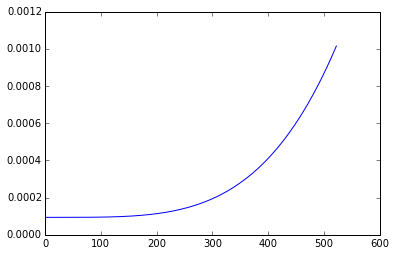

In [46]:
con=[]
Vcon=[]
### Value constraints
Vcon.append([1,0.0])
Vcon.append([Nfst,Yup])
con.append(Vcon)
### 1.st Derivative/spacing constraint
Dcon=[]
Dcon.append([1,y_spacing])
con.append(Dcon)
### 2.nd Deriv
Dcon=[]
Dcon.append([1,0.0])
con.append(Dcon)

p3=tools.polynomial(con,rest='odd')
        
x3=range(1,Vcon[-1][0]+1)
y3=np.zeros(len(x3))
y3=p3.evaluate(x3,maxd=6)

if(bdim):
    indlow=min(range(len(y3[0])), key=lambda i: abs(y3[0][i]+Ylow))
    print 'extra number of points below wall',indlow,y3[0][indlow]
    x3=range(-indlow,Vcon[-1][0]+1)
 #   y3=np.zeros(len(x3+indlow))
    y3=p3.evaluate(x3,maxd=6)
    x3=range(0,indlow+Nfst+1)

print 'maximum spacing and ratio between highest and gen spacing', max(y3[1][:]), max(y3[1][:])/y3[1][0] 
print 'maximum spacing and ratio between highest and gen spacing', max(y3[1]), min(y3[1]) 
print 
plt.figure()
plt.plot(x3,y3[1])

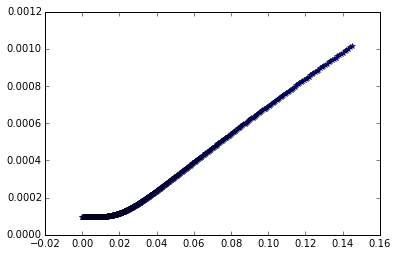

In [47]:
jjs=x3
y=y3
yspacing=[]
for i in range(1,len(y[0])):
    yspacing.append(y[0][i]-y[0][i-1])

plt.figure()
#plt.plot(jjs,y[1])
plt.plot(y[0],y[1],'*')

In [48]:
IO.write_grid(1,rgrid=y[0])    
IO.write_grid(1,zgrid=x[0])        


in zgrid==0
in rgrid==0


In [49]:
ll -rt

total 1400
-rw-rw-r-- 1 stefan   6802 Aug  6  2013 eigenfunc.py
-rw-rw-r-- 1 stefan   6291 Sep 30  2013 massflow.py
-rw-rw-r-- 1 stefan   5768 Oct 29  2013 LNA_incomp_ref.dat
-rw-rw-r-- 1 stefan  72629 May 16  2014 TSwave_1stOrd_epsilon.eps
-rw-rw-r-- 1 stefan 112714 May 16  2014 TSwave_1stOrd_epsilon.tikz
-rw-rw-r-- 1 stefan  21943 May 21  2014 Ufunc_filtering.tikz
-rw-rw-r-- 1 stefan  50971 May 21  2014 Ufunc_filtering.eps
-rw-rw-r-- 1 stefan  22045 May 21  2014 Ufunc_extremes_2ndOrd.tikz
-rw-rw-r-- 1 stefan  62191 May 21  2014 Ufunc_extremes_2ndOrd.eps
-rw-rw-r-- 1 stefan  16866 May 27  2014 powerspectra.py
-rw-rw-r-- 1 stefan  34615 May 27  2014 compare_statprof.py
-rw-rw-r-- 1 stefan  44293 May 27  2014 velocity_fluct.png
-rw-rw-r-- 1 stefan 104637 May 27  2014 TSwave_psd_vel_2nd.eps
-rw-rw-r-- 1 stefan 497942 May 27  2014 TSwave_psd_vel_2nd.tikz
-rw-rw-r-- 1 stefan   9057 Jun  5  2014 monitor_ts.py
drwxrwxr-x 3 stefan   4096 Sep 24  2014 grid/
drwxrwxr-x 2 stefan   4096 Sep 24  2

In [50]:
print 'number of grid points: (x,y,abs):',len(x[0]),len(y[0]),len(x[0])*len(y[0])
print 'x: minimum and maximum spacing:',min(xspacing),max(xspacing)
print 'index and physical location of minimum spacing',xspacing.index(min(xspacing)),x[0][xspacing.index(min(xspacing))]
print 'spacing at the inlet:',xspacing[0],' and outlet:',xspacing[-1]

print 
print 'y: minimum and maximum spacing:',min(yspacing),max(yspacing),\
     yspacing.index(min(yspacing)),y[0][yspacing.index(min(yspacing))]
print 'spacing freestream bounds:',yspacing[0],yspacing[-1],
print 


number of grid points: (x,y,abs): 1615 522 843030
x: minimum and maximum spacing: 0.00273513793945 0.108081817627
index and physical location of minimum spacing 1508 4.53913402557
spacing at the inlet: 0.00283875  and outlet: 0.108081817627

y: minimum and maximum spacing: 9.37500000314e-05 0.00101126923103 0 -4.04965385381e-21
spacing freestream bounds: 9.37500000314e-05 0.00101126923103


In [51]:
ll -rt

total 1400
-rw-rw-r-- 1 stefan   6802 Aug  6  2013 eigenfunc.py
-rw-rw-r-- 1 stefan   6291 Sep 30  2013 massflow.py
-rw-rw-r-- 1 stefan   5768 Oct 29  2013 LNA_incomp_ref.dat
-rw-rw-r-- 1 stefan  72629 May 16  2014 TSwave_1stOrd_epsilon.eps
-rw-rw-r-- 1 stefan 112714 May 16  2014 TSwave_1stOrd_epsilon.tikz
-rw-rw-r-- 1 stefan  21943 May 21  2014 Ufunc_filtering.tikz
-rw-rw-r-- 1 stefan  50971 May 21  2014 Ufunc_filtering.eps
-rw-rw-r-- 1 stefan  22045 May 21  2014 Ufunc_extremes_2ndOrd.tikz
-rw-rw-r-- 1 stefan  62191 May 21  2014 Ufunc_extremes_2ndOrd.eps
-rw-rw-r-- 1 stefan  16866 May 27  2014 powerspectra.py
-rw-rw-r-- 1 stefan  34615 May 27  2014 compare_statprof.py
-rw-rw-r-- 1 stefan  44293 May 27  2014 velocity_fluct.png
-rw-rw-r-- 1 stefan 104637 May 27  2014 TSwave_psd_vel_2nd.eps
-rw-rw-r-- 1 stefan 497942 May 27  2014 TSwave_psd_vel_2nd.tikz
-rw-rw-r-- 1 stefan   9057 Jun  5  2014 monitor_ts.py
drwxrwxr-x 3 stefan   4096 Sep 24  2014 grid/
drwxrwxr-x 2 stefan   4096 Sep 24  2